# Personal Transaction Analysis

## HDFC Bank Account

In [1]:
# load the required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Initilise the drive for dataset
from google.colab import drive

# initilise tyhe path
drive.mount('/content/drive')

# Setting Address
import os
os.chdir('/content/drive/My Drive/bank statement ')

Mounted at /content/drive


In [3]:
# Load the data (HDFC bank Statement)
# This data is from 1st April 2022 to 31st March 2023
# Load the data
df_HDFC = pd.read_excel("my bank statement.xlsx")
df_HDFC.head()

,Date,Narration,Withdrawal Amt.,Deposit Amt.,Closing Balance,Month,Year
0,2022-04-04,UPI-VISHAL VINAYAK BHOYA-VISHALBHOYAR313,NaN,200.0,442.19,4,2022
1,2022-04-07,UPI-ANIL NARBAT BISEN-ANILBISEN229@OKSBI,NaN,50.0,492.19,4,2022
2,2022-04-07,UPI-SHRIRAM GENERAL STOR-GPAY-1119808673,50.0,NaN,442.19,4,2022
3,2022-04-12,UPI-IDRISH SHHA-BHARATPE.9051322211@FBP,30.0,NaN,412.19,4,2022
4,2022-04-13,UPI-RAMESHWAR VASANTRAO,NaN,100.0,512.19,4,2022


In [4]:
# Convert 'Date' column to datetime data type
df_HDFC['Date'] = pd.to_datetime(df_HDFC['Date'])

# Handling missing values (if any)
df_HDFC.fillna(0, inplace=True)  # Replace NaN with 0 for Withdrawal and Deposit Amounts

# Drop unnecessary columns (if needed)
df_HDFC.drop(['Month', 'Year'], axis=1, inplace=True)


In [5]:
df_HDFC.head()

,Date,Narration,Withdrawal Amt.,Deposit Amt.,Closing Balance
0,2022-04-04,UPI-VISHAL VINAYAK BHOYA-VISHALBHOYAR313,0.0,200.0,442.19
1,2022-04-07,UPI-ANIL NARBAT BISEN-ANILBISEN229@OKSBI,0.0,50.0,492.19
2,2022-04-07,UPI-SHRIRAM GENERAL STOR-GPAY-1119808673,50.0,0.0,442.19
3,2022-04-12,UPI-IDRISH SHHA-BHARATPE.9051322211@FBP,30.0,0.0,412.19
4,2022-04-13,UPI-RAMESHWAR VASANTRAO,0.0,100.0,512.19


In [6]:
# Total income and total expenses
total_income = df_HDFC['Deposit Amt.'].sum()
total_expenses = df_HDFC['Withdrawal Amt.'].sum()

# Print those
print("total_income: ",total_income)

print("total_expenses: ",total_expenses )

total_income:  729578.0
total_expenses:  729503.33


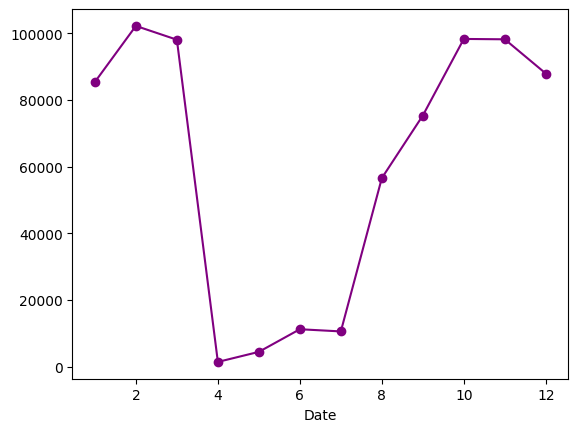

In [51]:
# Monthly spending patterns
monthly_expenses = df_HDFC.groupby(df_HDFC['Date'].dt.month)['Withdrawal Amt.'].sum()
monthly_expenses.plot(color = "purple",marker='o')
plt.show()

In [8]:
# Major expenses
top_expenses = df_HDFC.nlargest(5, 'Withdrawal Amt.')
top_expenses

,Date,Narration,Withdrawal Amt.,Deposit Amt.,Closing Balance
563,2022-11-11,UPI-VISHAL VINAYAK BHOYA-VISHALBHOYAR313,50000.0,0.0,18543.57
656,2022-12-02,UPI-VISHAL VINAYAK BHOYA-VISHALBHOYAR313,50000.0,0.0,2765.81
790,2023-01-04,UPI-VISHAL VINAYAK BHOYA-VISHALBHOYAR313,50000.0,0.0,4087.80
945,2023-02-13,UPI-VISHAL VINAYAK BHOYA-VISHALBHOYAR313,50000.0,0.0,12579.29
1028,2023-03-02,UPI-VISHAL VINAYAK BHOYA-VISHALBHOYAR313,50000.0,0.0,3888.27


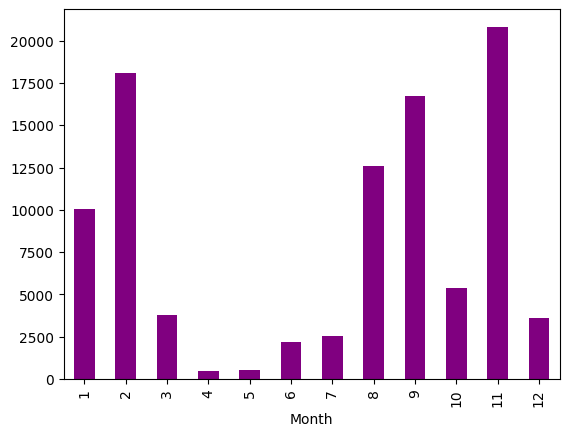

In [9]:
# Average Monthly Balance:
# Calculate the average monthly balance based on the closing balance for each month.
df_HDFC['Month'] = df_HDFC['Date'].dt.month
average_monthly_balance = df_HDFC.groupby('Month')['Closing Balance'].mean()
average_monthly_balance.plot(kind = "bar",color = "purple")
plt.show()

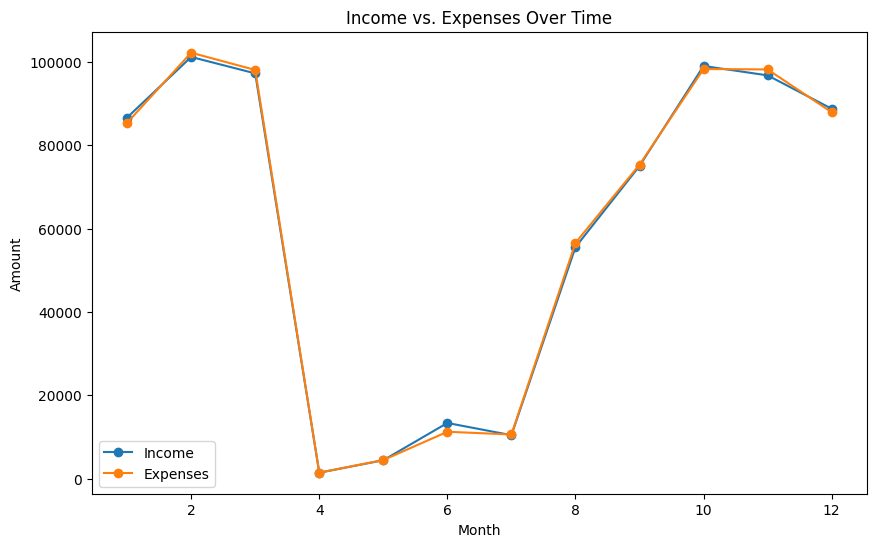

In [10]:
# Income vs. Expenses Over Time:
# Visualize the trend of your income and expenses over the months.
monthly_income = df_HDFC.groupby('Month')['Deposit Amt.'].sum()
monthly_expenses = df_HDFC.groupby('Month')['Withdrawal Amt.'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_income.index, monthly_income, label='Income', marker='o')
plt.plot(monthly_expenses.index, monthly_expenses, label='Expenses', marker='o')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Income vs. Expenses Over Time')
plt.legend()
plt.show()

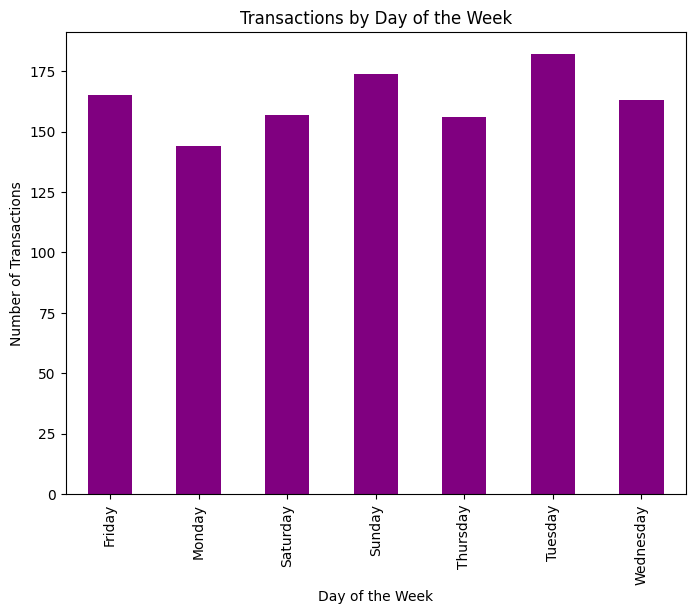

In [11]:
# Day of the Week Analysis:
# Check if there's any pattern in your transactions based on the day of the week.
df_HDFC['Day_of_Week'] = df_HDFC['Date'].dt.day_name()
transactions_by_day = df_HDFC.groupby('Day_of_Week').size()

plt.figure(figsize=(8, 6))
transactions_by_day.plot(kind='bar',color = "purple")
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Transactions by Day of the Week')
plt.show()


In [12]:
# Top Income Sources:
# If the 'Narration' column contains details about income sources, you can identify the top sources.
top_income_sources = df_HDFC.nlargest(5, 'Deposit Amt.')
top_income_sources

,Date,Narration,Withdrawal Amt.,Deposit Amt.,Closing Balance,Month,Day_of_Week
1027,2023-03-02,UPI-AMAN JANGID-PAYTQR6377020338@PAYTM-B,0.0,53527.0,53888.27,3,Thursday
789,2023-01-04,UPI-AMAN JANGID-PAYTQR6377020338@PAYTM-B,0.0,53500.0,54087.80,1,Wednesday
898,2023-02-02,UPI-AMAN JANGID-PAYTQR6377020338@PAYTM-B,0.0,52858.0,54798.80,2,Thursday
507,2022-11-01,UPI-AMAN JANGID-PAYTQR6377020338@PAYTM-B,0.0,52650.0,54195.57,11,Tuesday
653,2022-12-02,IMPS-233611598080-AMAN JANGID-PYTM-XXXXX,0.0,52195.0,52815.81,12,Friday


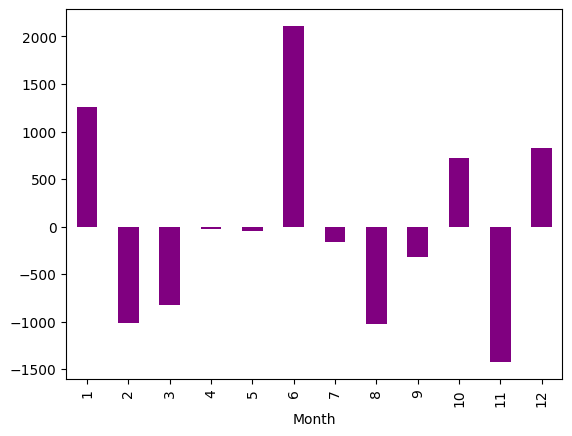

In [13]:
# Net Cash Flow:
# Calculate the net cash flow for each month (income minus expenses).
df_HDFC['Net_Cash_Flow'] = df_HDFC['Deposit Amt.'] - df_HDFC['Withdrawal Amt.']
monthly_cash_flow = df_HDFC.groupby('Month')['Net_Cash_Flow'].sum()
monthly_cash_flow.plot(kind = "bar",color = "purple")
plt.show()

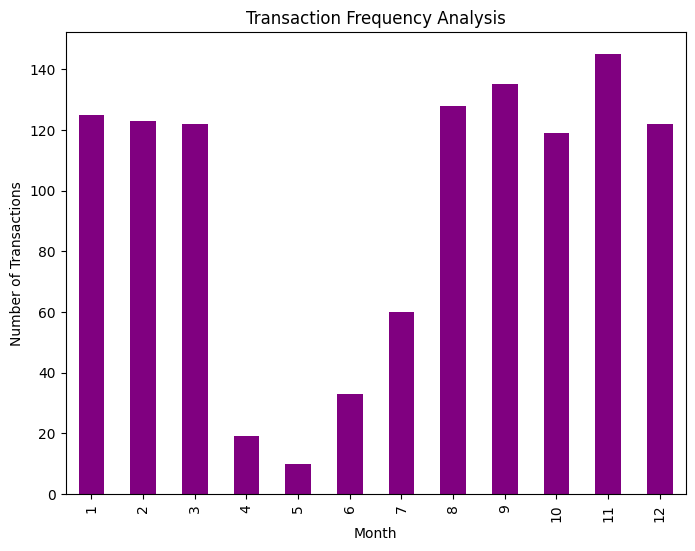

In [14]:
# Transaction Frequency Analysis:
# Analyze the frequency of transactions during the year.
transaction_frequency = df_HDFC.groupby('Month').size()

plt.figure(figsize=(8, 6))
transaction_frequency.plot(kind='bar',color = "purple")
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Transaction Frequency Analysis')
plt.show()


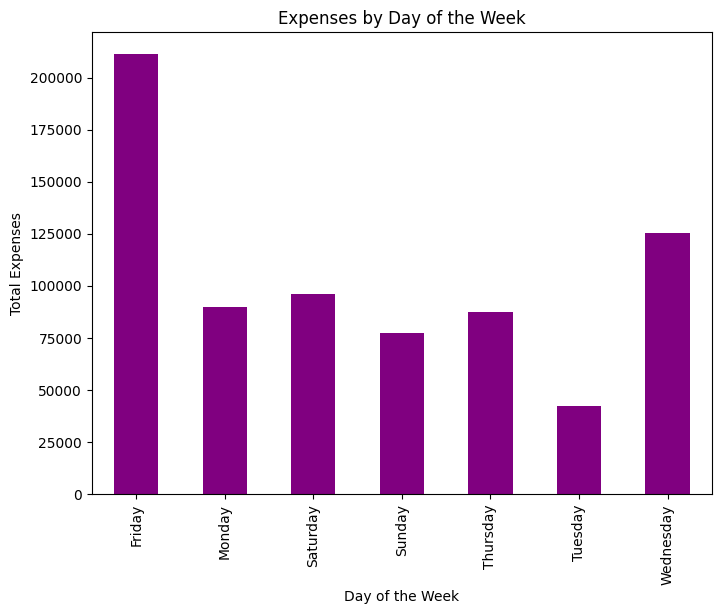

In [15]:
# Expenses by Day of the Week:
# Analyze your expenses on each day of the week to identify spending patterns.
expenses_by_day_of_week = df_HDFC[df_HDFC['Withdrawal Amt.'] > 0].groupby('Day_of_Week')['Withdrawal Amt.'].sum()

plt.figure(figsize=(8, 6))
expenses_by_day_of_week.plot(kind='bar',color = "purple")
plt.xlabel('Day of the Week')
plt.ylabel('Total Expenses')
plt.title('Expenses by Day of the Week')
plt.show()

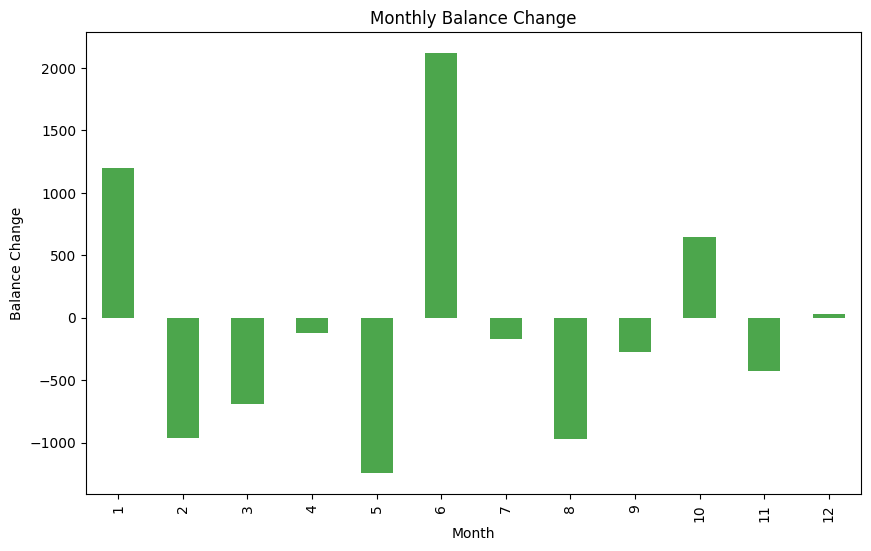

In [16]:
# Monthly Balance Change:
# Plot the change in your account balance over the months to see how it fluctuates.
monthly_balance_change = df_HDFC.groupby('Month')['Closing Balance'].last() - df_HDFC.groupby('Month')['Closing Balance'].first()

plt.figure(figsize=(10, 6))
monthly_balance_change.plot(kind='bar', color='g', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Balance Change')
plt.title('Monthly Balance Change')
plt.show()


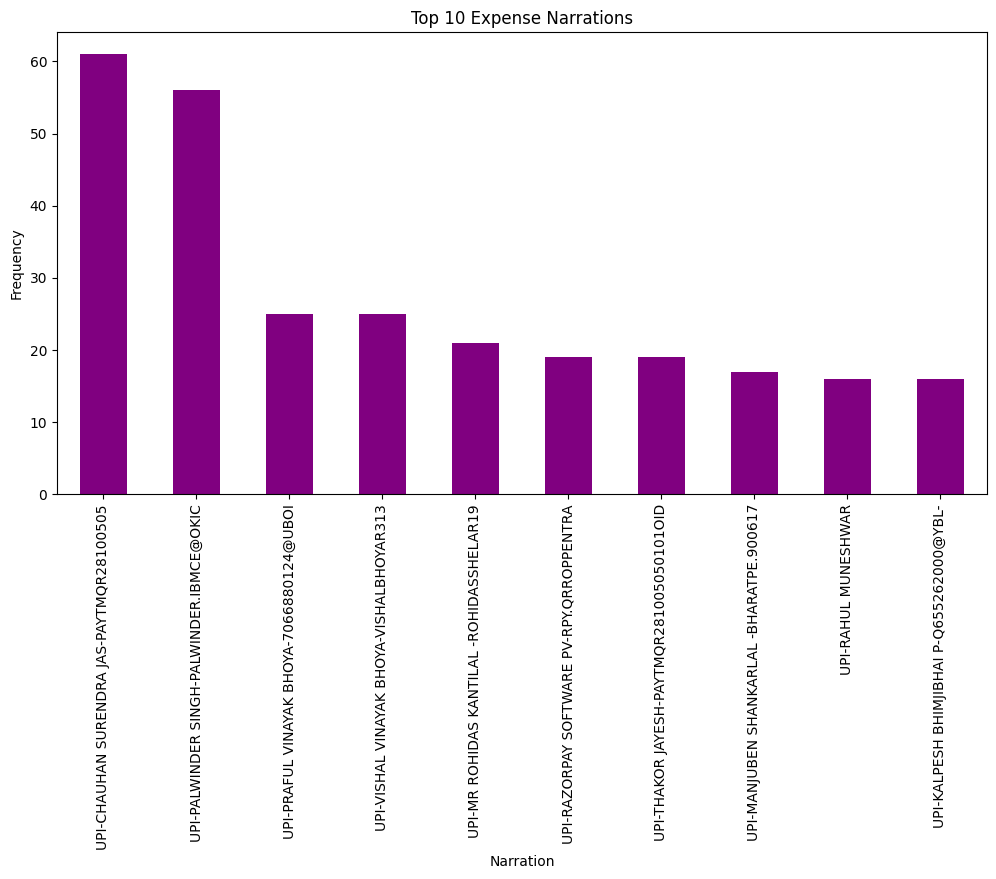

In [17]:
# Expense Distribution by Narration:
# Analyze the distribution of expenses based on the descriptions in the 'Narration' column.
plt.figure(figsize=(12, 6))
top_narrations = df_HDFC['Narration'].value_counts().nlargest(10)
top_narrations.plot(kind='bar',color = "purple")
plt.xlabel('Narration')
plt.ylabel('Frequency')
plt.title('Top 10 Expense Narrations')
plt.show()


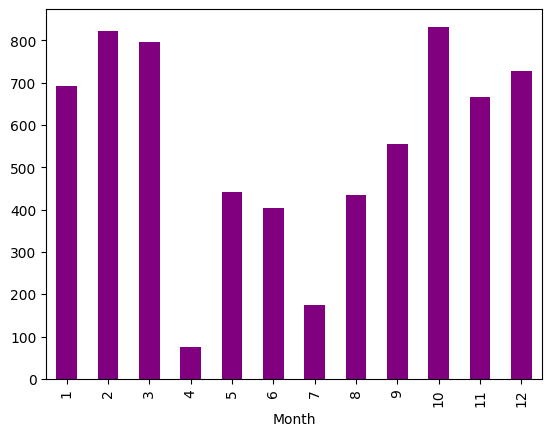

In [18]:
# Average Withdrawal and Deposit Amounts:
# Calculate the average withdrawal and deposit amounts for each month.
average_withdrawal_per_month = df_HDFC.groupby('Month')['Withdrawal Amt.'].mean()
average_deposit_per_month = df_HDFC.groupby('Month')['Deposit Amt.'].mean()
average_deposit_per_month.plot(kind = "bar",color = "purple")
plt.show()

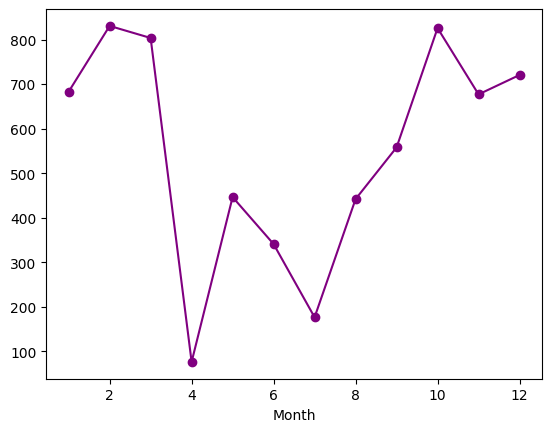

In [50]:
average_withdrawal_per_month.plot(kind = "line",color = "purple",marker='o')
plt.show()

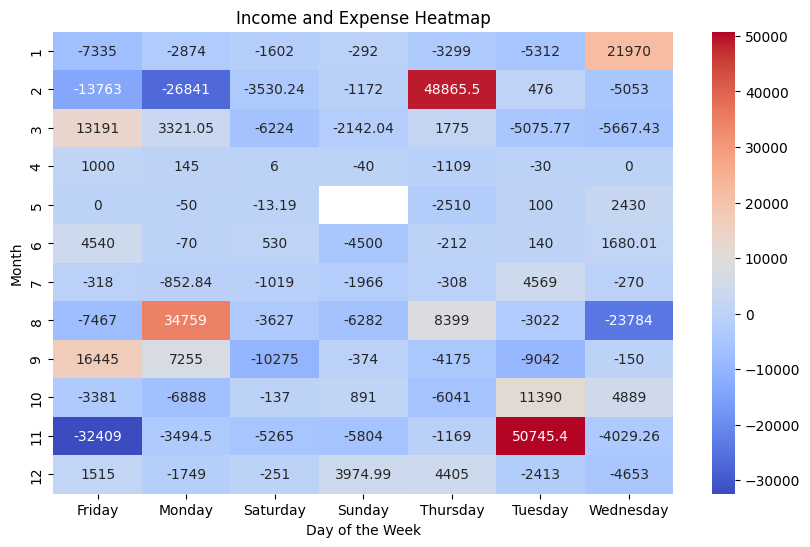

In [20]:
# Income and Expense Heatmap:
# Create a heatmap to visualize the distribution of income and expenses across different months.
income_expense_heatmap = df_HDFC.pivot_table(index='Month', columns='Day_of_Week', values='Net_Cash_Flow', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(income_expense_heatmap, cmap='coolwarm', annot=True, fmt='g')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.title('Income and Expense Heatmap')
plt.show()


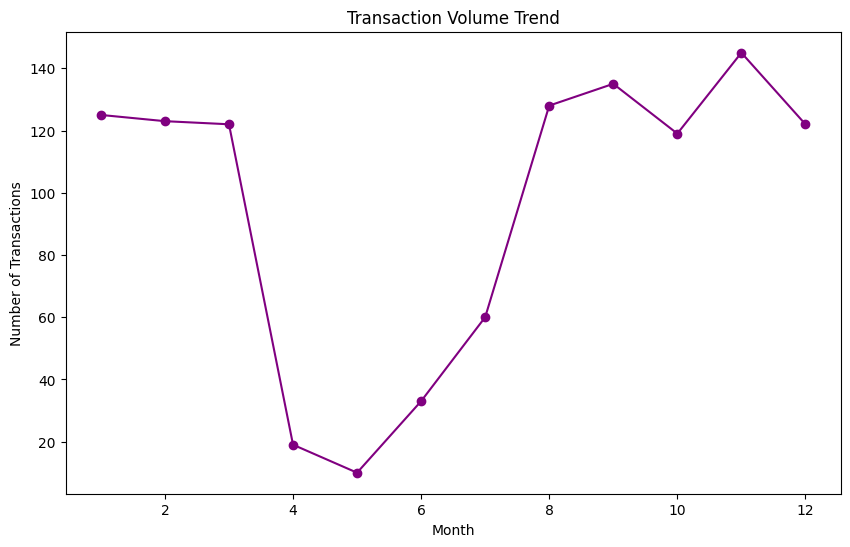

In [48]:
# Transaction Volume Trend:
# Visualize the trend of the number of transactions over the months.
monthly_transaction_count = df_HDFC.groupby('Month').size()

plt.figure(figsize=(10, 6))
monthly_transaction_count.plot(kind='line', marker='o',color = "purple")
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Transaction Volume Trend')
plt.show()


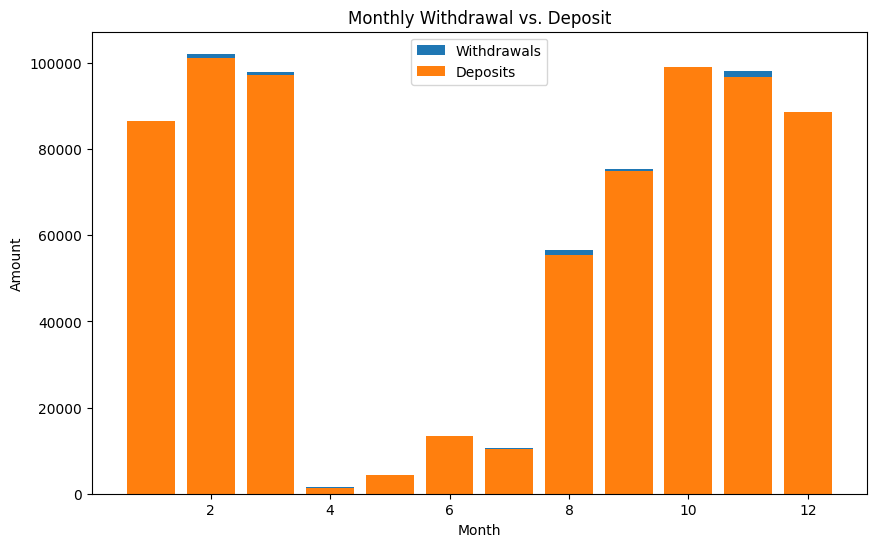

In [22]:
# Monthly Withdrawal vs. Deposit Comparison:
# Compare the monthly total withdrawal and deposit amounts.
monthly_withdrawals = df_HDFC.groupby('Month')['Withdrawal Amt.'].sum()
monthly_deposits = df_HDFC.groupby('Month')['Deposit Amt.'].sum()

plt.figure(figsize=(10, 6))
plt.bar(monthly_withdrawals.index, monthly_withdrawals, label='Withdrawals')
plt.bar(monthly_deposits.index, monthly_deposits, label='Deposits')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Withdrawal vs. Deposit')
plt.legend()
plt.show()


In [23]:
bank_statement_df = df_HDFC

average_daily_expenses:  Month
1     2943.586207
2     3648.848214
3     3162.393226
4      111.461538
5      557.898750
6      865.153077
7      504.325714
8     1824.419355
9     2510.400000
10    3275.500000
11    3271.878667
12    2835.387419
Name: Withdrawal Amt., dtype: float64


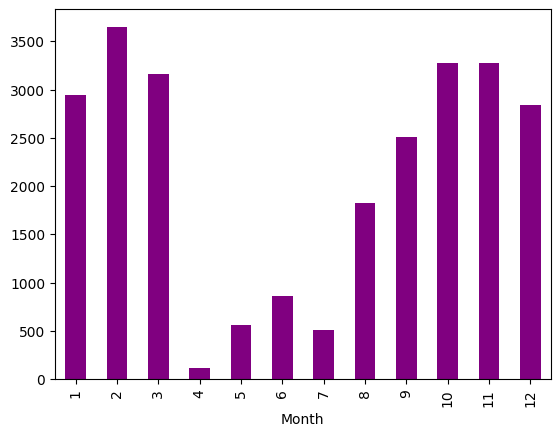

In [24]:
# Average Daily Expenses:
# Calculate the average daily expenses for each month.
bank_statement_df['Day'] = bank_statement_df['Date'].dt.day
daily_expenses = bank_statement_df.groupby(['Month', 'Day'])['Withdrawal Amt.'].sum().reset_index()
average_daily_expenses = daily_expenses.groupby('Month')['Withdrawal Amt.'].mean()
print("average_daily_expenses: ",average_daily_expenses)
average_daily_expenses.plot(kind = "bar",color = "purple")
plt.show()

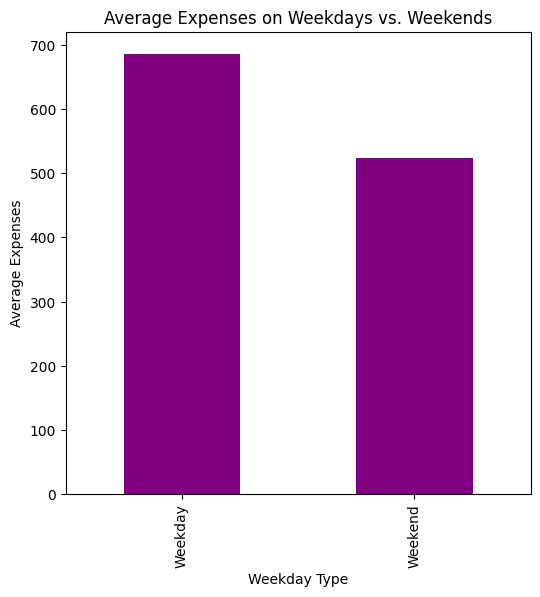

In [25]:
# Weekday vs. Weekend Expenses:
# Compare your average expenses on weekdays and weekends.
def categorize_weekday(weekday):
    if weekday in ['Saturday', 'Sunday']:
        return 'Weekend'
    return 'Weekday'

bank_statement_df['Weekday_Type'] = bank_statement_df['Day_of_Week'].apply(categorize_weekday)
expenses_by_weekday_type = bank_statement_df.groupby('Weekday_Type')['Withdrawal Amt.'].mean()

plt.figure(figsize=(6, 6))
expenses_by_weekday_type.plot(kind='bar',color = "purple")
plt.xlabel('Weekday Type')
plt.ylabel('Average Expenses')
plt.title('Average Expenses on Weekdays vs. Weekends')
plt.show()


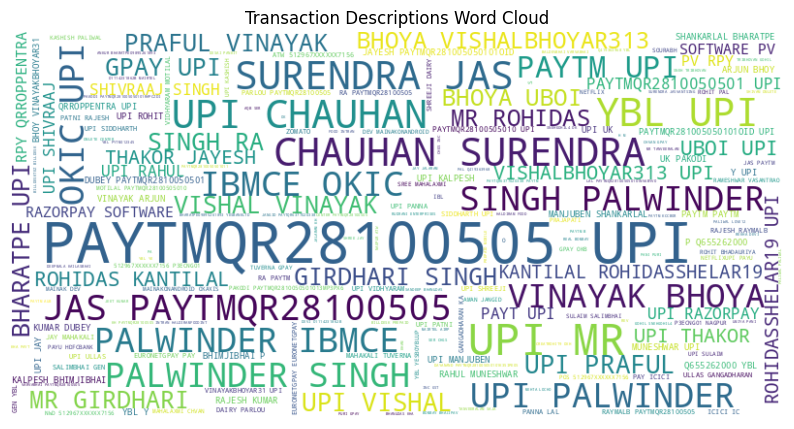

In [26]:
# Transaction Descriptions Word Cloud:
# Create a word cloud to visualize the most frequent words in transaction descriptions.
from wordcloud import WordCloud

narration_words = ' '.join(bank_statement_df['Narration'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(narration_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Transaction Descriptions Word Cloud')
plt.show()


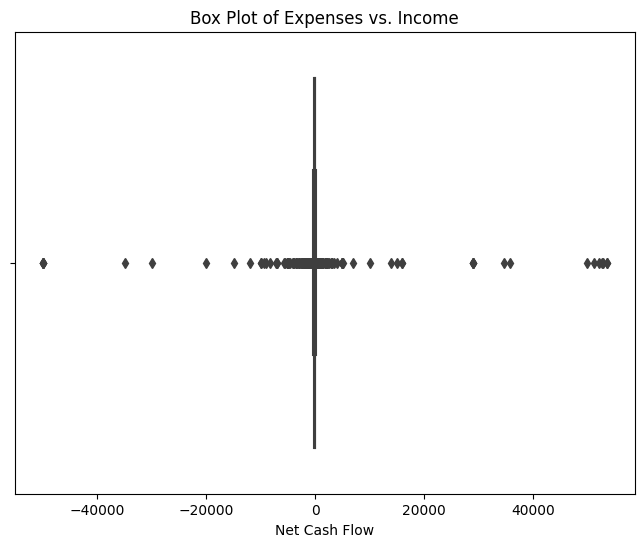

In [27]:
# Expenses vs. Income Box Plot:
# Compare the distribution of expenses and income using a box plot.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Net_Cash_Flow', data=bank_statement_df)
plt.xlabel('Net Cash Flow')
plt.title('Box Plot of Expenses vs. Income')
plt.show()


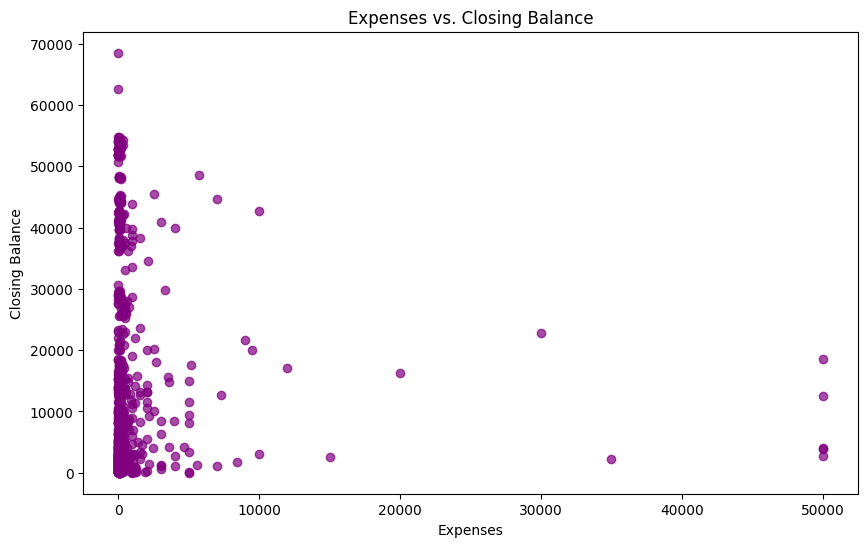

In [28]:
# Expenses vs. Closing Balance Scatter Plot:
# Visualize the relationship between expenses and the closing balance for each transaction.
plt.figure(figsize=(10, 6))
plt.scatter(bank_statement_df['Withdrawal Amt.'], bank_statement_df['Closing Balance'], alpha=0.7,color = "purple")
plt.xlabel('Expenses')
plt.ylabel('Closing Balance')
plt.title('Expenses vs. Closing Balance')
plt.show()

monthly_savings:  Month
1     1256.00
2    -1017.75
3     -822.19
4      -28.00
5      -43.19
6     2108.01
7     -164.84
8    -1024.00
9     -316.00
10     723.00
11   -1425.36
12     828.99
dtype: float64


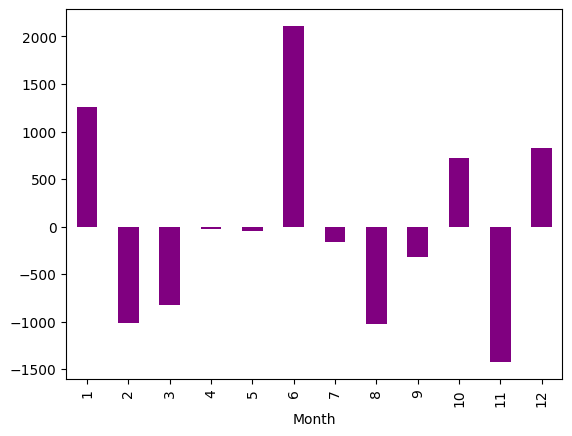

In [29]:
# Monthly Savings:
# Calculate your monthly savings by subtracting total expenses from total income.
monthly_savings = monthly_income - monthly_expenses
print("monthly_savings: ",monthly_savings)
monthly_savings.plot(kind = "bar",color = "purple")
plt.show()

In [30]:
# Biggest Income and Expense Days:
# Identify the days with the highest income and expenses.
biggest_income_day = bank_statement_df.nlargest(1, 'Deposit Amt.')
biggest_expense_day = bank_statement_df.nlargest(1, 'Withdrawal Amt.')
print("biggest_income_day: ")
biggest_income_day


biggest_income_day: 


,Date,Narration,Withdrawal Amt.,Deposit Amt.,Closing Balance,Month,Day_of_Week,Net_Cash_Flow,Day,Weekday_Type
1027,2023-03-02,UPI-AMAN JANGID-PAYTQR6377020338@PAYTM-B,0.0,53527.0,53888.27,3,Thursday,53527.0,2,Weekday


In [31]:
print("biggest_expense_day: ")
biggest_expense_day

biggest_expense_day: 


,Date,Narration,Withdrawal Amt.,Deposit Amt.,Closing Balance,Month,Day_of_Week,Net_Cash_Flow,Day,Weekday_Type
563,2022-11-11,UPI-VISHAL VINAYAK BHOYA-VISHALBHOYAR313,50000.0,0.0,18543.57,11,Friday,-50000.0,11,Weekday


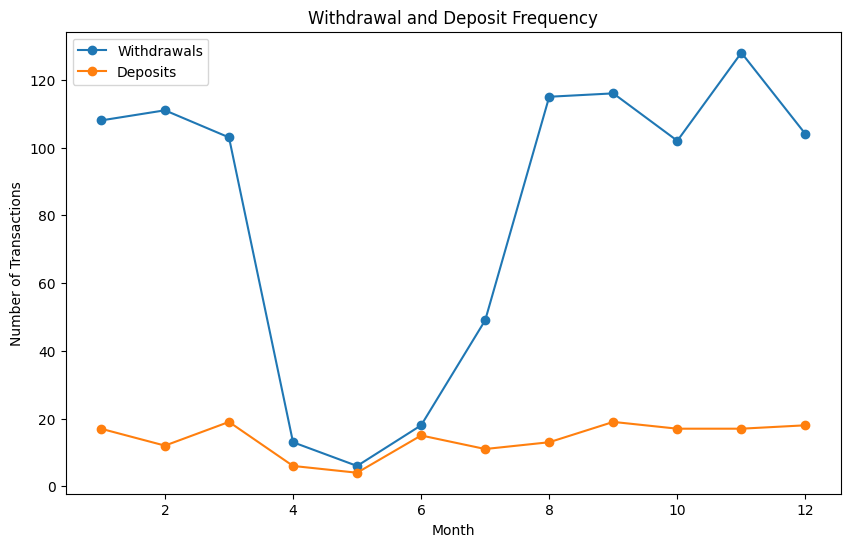

In [32]:
# Withdrawal and Deposit Frequency:
# Analyze the frequency of withdrawals and deposits over the months.
withdrawal_frequency = bank_statement_df[bank_statement_df['Withdrawal Amt.'] > 0].groupby('Month').size()
deposit_frequency = bank_statement_df[bank_statement_df['Deposit Amt.'] > 0].groupby('Month').size()

plt.figure(figsize=(10, 6))
withdrawal_frequency.plot(kind='line', marker='o', label='Withdrawals')
deposit_frequency.plot(kind='line', marker='o', label='Deposits')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Withdrawal and Deposit Frequency')
plt.legend()
plt.show()


daily_average_balance:  Month
1     324.653419
2     583.759428
3     122.979434
4      15.377385
5      16.921032
6      70.252258
7      82.222833
8     406.677611
9     540.441804
10    174.164877
11    671.466721
12    116.700767
Name: Closing Balance, dtype: float64


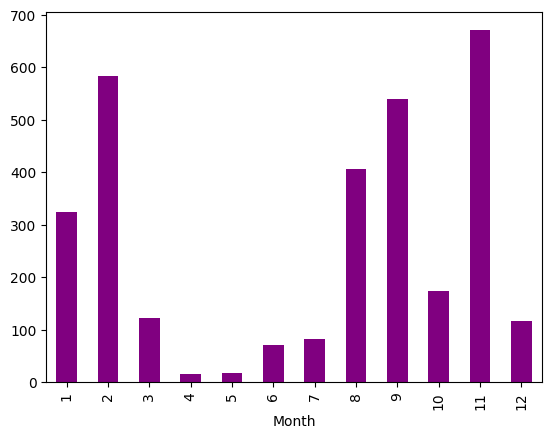

In [33]:
# Daily Average Balance:
# Calculate the daily average balance for each month.
daily_average_balance = bank_statement_df.groupby('Month')['Closing Balance'].mean() / bank_statement_df['Day'].nunique()
print("daily_average_balance: ",daily_average_balance)
daily_average_balance.plot(kind = "bar",color = "purple")
plt.show()

In [34]:
# Transaction Outliers:
# Identify any outliers in transactions that are significantly higher or lower than typical.
transaction_outliers = bank_statement_df[
    (bank_statement_df['Withdrawal Amt.'] > bank_statement_df['Withdrawal Amt.'].mean() + 3 * bank_statement_df['Withdrawal Amt.'].std()) |
    (bank_statement_df['Deposit Amt.'] > bank_statement_df['Deposit Amt.'].mean() + 3 * bank_statement_df['Deposit Amt.'].std())
]
transaction_outliers.head()

,Date,Narration,Withdrawal Amt.,Deposit Amt.,Closing Balance,Month,Day_of_Week,Net_Cash_Flow,Day,Weekday_Type
127,2022-08-01,UPI-AMAN JANGID-PAYTQR6377020338@PAYTM-B,0.0,35740.0,37488.17,8,Monday,35740.0,1,Weekday
136,2022-08-03,UPI-AKSHAY RAJENDRA ROH-AKSHAYROHANKAR4,20000.0,0.0,16205.17,8,Wednesday,-20000.0,3,Weekday
177,2022-08-11,UPI-PRAFUL VINAYAK BHOYA-7066880124@UBOI,0.0,16000.0,27507.17,8,Thursday,16000.0,11,Weekday
253,2022-09-02,UPI-AMAN JANGID-PAYTQR6377020338@PAYTM-B,0.0,51120.0,51959.17,9,Friday,51120.0,2,Weekday
292,2022-09-09,UPI-AMAZON PAY-AMAZONUPI@APL-UTIB0000100,34979.0,0.0,2197.17,9,Friday,-34979.0,9,Weekday


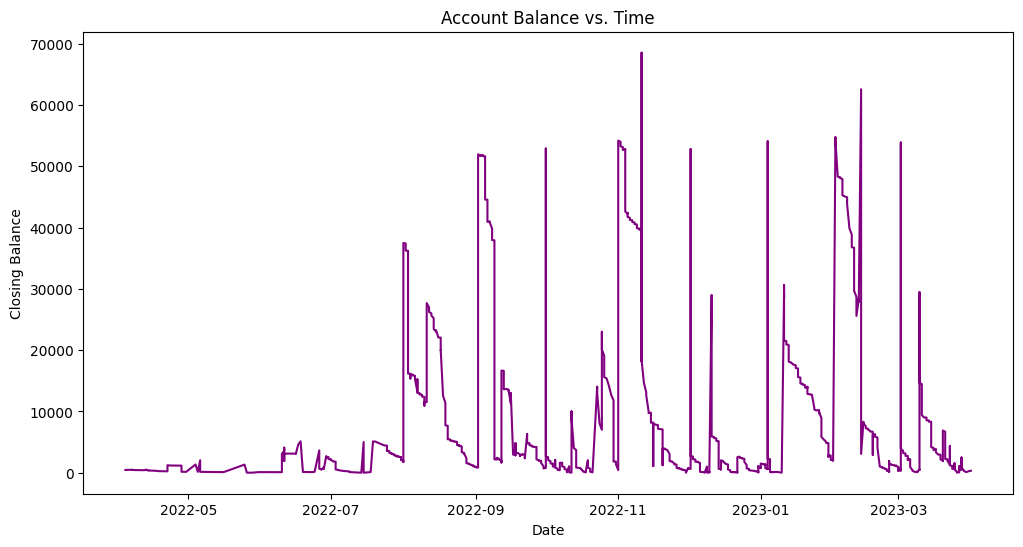

In [35]:
# Balance vs. Time Plot:
# Visualize the change in your account balance over time.
plt.figure(figsize=(12, 6))
plt.plot(bank_statement_df['Date'], bank_statement_df['Closing Balance'],color = "purple")
plt.xlabel('Date')
plt.ylabel('Closing Balance')
plt.title('Account Balance vs. Time')
plt.show()


In [36]:
# Expense vs. Income Ratio:
# Calculate the ratio of total expenses to total income for each month.
expense_income_ratio = total_expenses / total_income
print("expense_income_ratio: ",expense_income_ratio)

expense_income_ratio:  0.9998976531638837


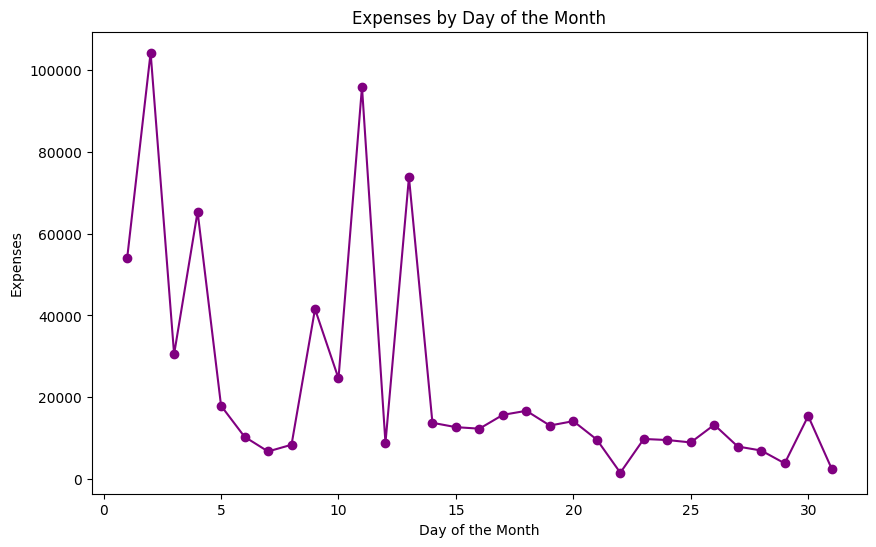

In [37]:
# Expenses by Day of the Month:
# Analyze your expenses on different days of the month.
expenses_by_day_of_month = bank_statement_df.groupby(bank_statement_df['Date'].dt.day)['Withdrawal Amt.'].sum()

plt.figure(figsize=(10, 6))
plt.plot(expenses_by_day_of_month.index, expenses_by_day_of_month, marker='o',color = "purple")
plt.xlabel('Day of the Month')
plt.ylabel('Expenses')
plt.title('Expenses by Day of the Month')
plt.show()


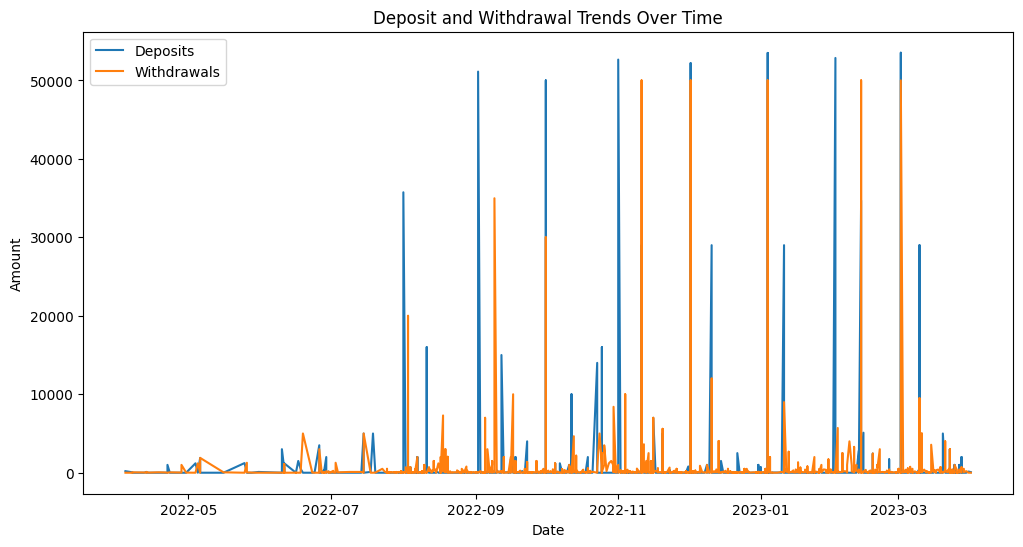

In [38]:
# Deposit and Withdrawal Trends Over Time:
# Visualize the trends of deposits and withdrawals over time.
plt.figure(figsize=(12, 6))
plt.plot(bank_statement_df['Date'], bank_statement_df['Deposit Amt.'], label='Deposits')
plt.plot(bank_statement_df['Date'], bank_statement_df['Withdrawal Amt.'], label='Withdrawals')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Deposit and Withdrawal Trends Over Time')
plt.legend()
plt.show()


average_expense_per_transaction:  Month
1    -682.912000
2    -830.632114
3    -803.558934
4     -76.263158
5    -446.319000
6    -340.817879
7    -176.514000
8    -441.851562
9    -557.866667
10   -825.756303
11   -676.940414
12   -720.467295
Name: Transaction_Amt, dtype: float64


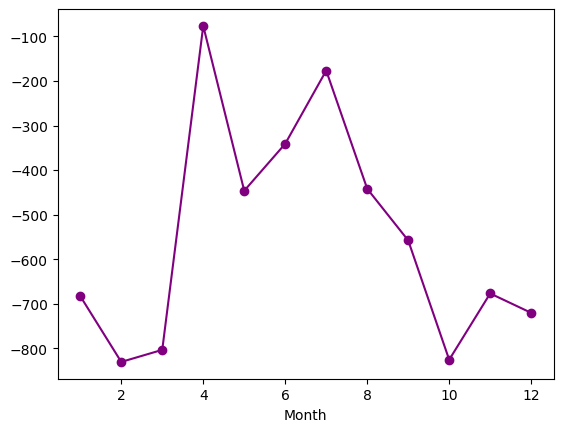

In [49]:
# Average Expense per Transaction:
# Calculate the average expense per transaction for each month.
bank_statement_df['Transaction_Amt'] = bank_statement_df['Withdrawal Amt.'] * -1
average_expense_per_transaction = bank_statement_df.groupby('Month')['Transaction_Amt'].mean()
print("average_expense_per_transaction: ",average_expense_per_transaction)
average_expense_per_transaction.plot(kind = "line", color = "purple",marker='o')
plt.show()

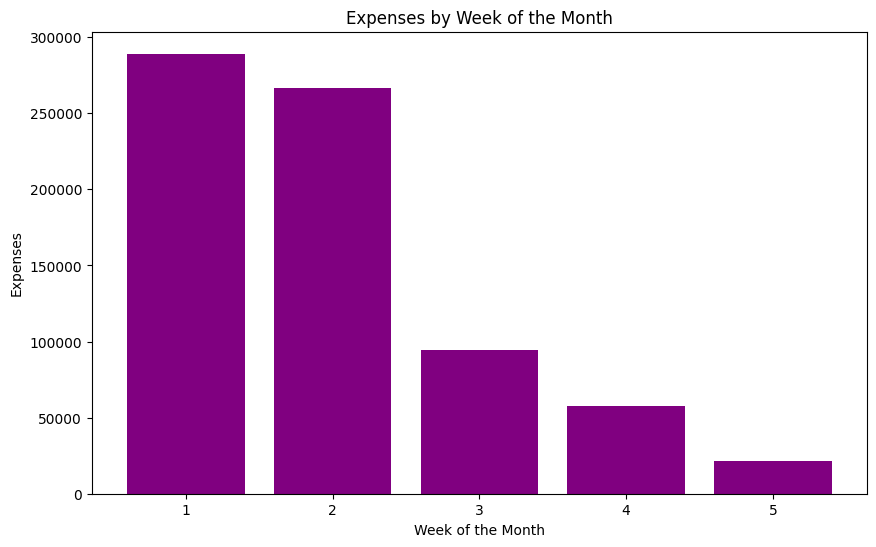

In [40]:
# Expenses by Week of the Month:
# # Analyze your expenses based on the week of the month (e.g., 1st week, 2nd week, etc.).
week_of_month = bank_statement_df['Date'].apply(lambda x: (x.day - 1) // 7 + 1)
expenses_by_week_of_month = bank_statement_df.groupby(week_of_month)['Withdrawal Amt.'].sum()

plt.figure(figsize=(10, 6))
plt.bar(expenses_by_week_of_month.index, expenses_by_week_of_month,color = "purple")
plt.xlabel('Week of the Month')
plt.ylabel('Expenses')
plt.title('Expenses by Week of the Month')
plt.show()


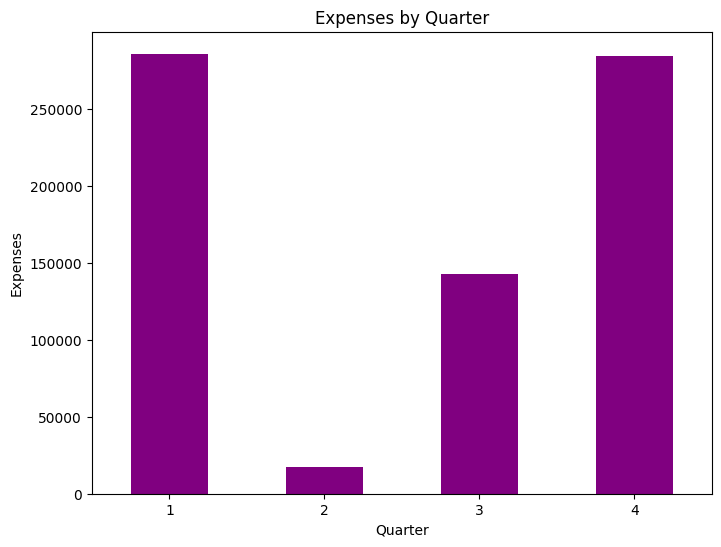

In [41]:
# Expenses by Quarter:
# Analyze your expenses on a quarterly basis.
quarterly_expenses = bank_statement_df.groupby(bank_statement_df['Date'].dt.quarter)['Withdrawal Amt.'].sum()

plt.figure(figsize=(8, 6))
quarterly_expenses.plot(kind='bar', rot=0,color = "purple")
plt.xlabel('Quarter')
plt.ylabel('Expenses')
plt.title('Expenses by Quarter')
plt.show()


In [42]:
# Financial Ratios:
# Calculate financial ratios to assess your financial health, such as the Debt-to-Income Ratio, Savings Ratio, or Expense-to-Income Ratio.

debt_to_income_ratio :  Month
1       8.421881
2       7.212094
3       7.504252
4     513.373209
5     165.046002
6      54.623986
7      69.969627
8      13.136393
9       9.727230
10      7.369614
11      7.541567
12      8.221979
Name: Deposit Amt., dtype: float64
Axes(0.125,0.11;0.775x0.77)


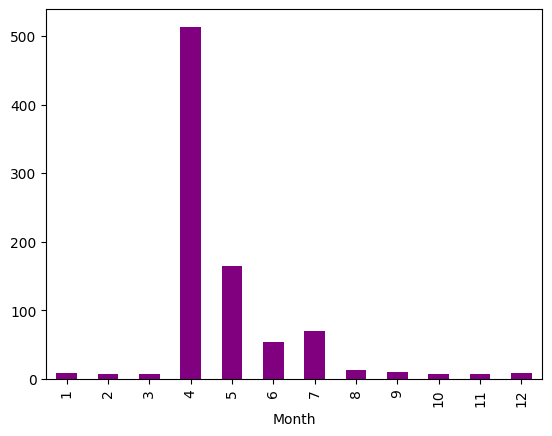

In [43]:
# Debt-to-Income Ratio: Total Monthly Debt Payments / Monthly Gross Income
debt_to_income_ratio = total_expenses / monthly_income
print("debt_to_income_ratio : ",debt_to_income_ratio)
print(debt_to_income_ratio.plot(kind = "bar",color = "purple"))
plt.show()

savings_ratio :  Month
1     0.014500
2    -0.010062
3    -0.008458
4    -0.019704
5    -0.009771
6     0.157844
7    -0.015810
8    -0.018439
9    -0.004214
10    0.007304
11   -0.014735
12    0.009343
dtype: float64
Axes(0.125,0.11;0.775x0.77)


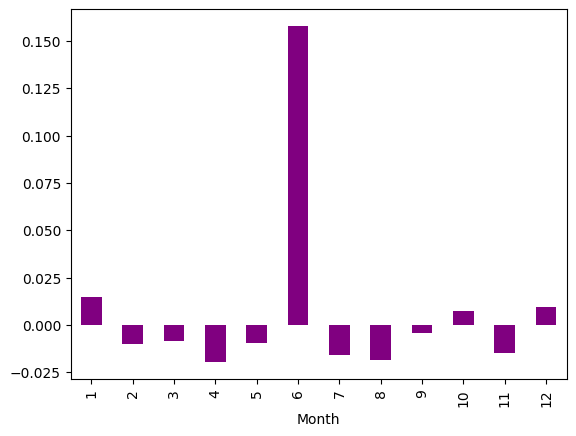

In [44]:
# Savings Ratio: Monthly Savings / Monthly Income
savings_ratio = monthly_savings / monthly_income
print("savings_ratio : ",savings_ratio)
print(savings_ratio.plot(kind = "bar",color = "purple"))
plt.show()

expense_to_income_ratio :  Month
1       8.421881
2       7.212094
3       7.504252
4     513.373209
5     165.046002
6      54.623986
7      69.969627
8      13.136393
9       9.727230
10      7.369614
11      7.541567
12      8.221979
Name: Deposit Amt., dtype: float64
Axes(0.125,0.11;0.775x0.77)


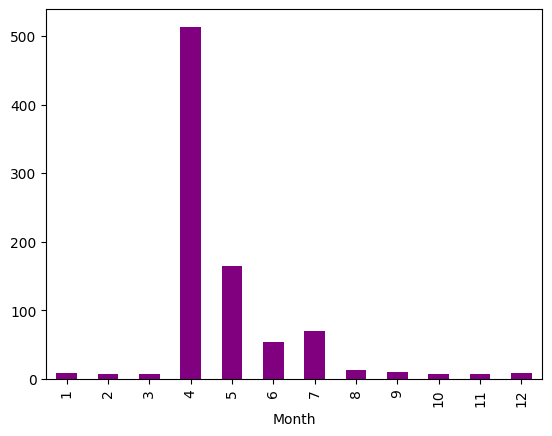

In [45]:
# Expense-to-Income Ratio: Total Monthly Expenses / Monthly Gross Income
expense_to_income_ratio = total_expenses / monthly_income
print("expense_to_income_ratio : ",expense_to_income_ratio)
print(expense_to_income_ratio.plot(kind = "bar",color = "purple"))
plt.show()

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering (e.g., 'Withdrawal Amt.' and 'Deposit Amt.')
features_for_clustering = bank_statement_df[['Withdrawal Amt.', 'Deposit Amt.']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Determine the optimal number of clusters using the Elbow method or other techniques
kmeans = KMeans(n_clusters=3)  # You can choose the appropriate number of clusters
bank_statement_df['Cluster'] = kmeans.fit_predict(scaled_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
bank_statement_df.head()

,Date,Narration,Withdrawal Amt.,Deposit Amt.,Closing Balance,Month,Day_of_Week,Net_Cash_Flow,Day,Weekday_Type,Transaction_Amt,Cluster
0,2022-04-04,UPI-VISHAL VINAYAK BHOYA-VISHALBHOYAR313,0.0,200.0,442.19,4,Monday,200.0,4,Weekday,-0.0,0
1,2022-04-07,UPI-ANIL NARBAT BISEN-ANILBISEN229@OKSBI,0.0,50.0,492.19,4,Thursday,50.0,7,Weekday,-0.0,0
2,2022-04-07,UPI-SHRIRAM GENERAL STOR-GPAY-1119808673,50.0,0.0,442.19,4,Thursday,-50.0,7,Weekday,-50.0,0
3,2022-04-12,UPI-IDRISH SHHA-BHARATPE.9051322211@FBP,30.0,0.0,412.19,4,Tuesday,-30.0,12,Weekday,-30.0,0
4,2022-04-13,UPI-RAMESHWAR VASANTRAO,0.0,100.0,512.19,4,Wednesday,100.0,13,Weekday,-0.0,0
